## Import Libary

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Load Dataset

In [2]:
data = pd.read_csv('loan_data_2007_2014.csv')

C:\Users\ASUS\AppData\Local\Temp\ipykernel_12328\1926087617.py:1: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('loan_data_2007_2014.csv')


# 1. Data Understanding

In [3]:
data.head()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
data.tail()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
466280,466280,8598660,1440975,18400,18400,18400.0,60 months,14.47,432.64,C,...,NaN,NaN,NaN,NaN,NaN,NaN,29900.0,NaN,NaN,NaN
466281,466281,9684700,11536848,22000,22000,22000.0,60 months,19.97,582.50,D,...,NaN,NaN,NaN,NaN,NaN,NaN,39400.0,NaN,NaN,NaN
466282,466282,9584776,11436914,20700,20700,20700.0,60 months,16.99,514.34,D,...,NaN,NaN,NaN,NaN,NaN,NaN,13100.0,NaN,NaN,NaN
466283,466283,9604874,11457002,2000,2000,2000.0,36 months,7.90,62.59,A,...,NaN,NaN,NaN,NaN,NaN,NaN,53100.0,NaN,NaN,NaN
466284,466284,9199665,11061576,10000,10000,9975.0,36 months,19.20,367.58,D,...,NaN,NaN,NaN,NaN,NaN,NaN,16000.0,NaN,NaN,NaN


## 1.1 Get Information About Our Dataset Like Total Number Rows, Total Number of Columns, Datatypes of Each Column And Memory Requirement

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 75 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   466285 non-null  int64  
 1   id                           466285 non-null  int64  
 2   member_id                    466285 non-null  int64  
 3   loan_amnt                    466285 non-null  int64  
 4   funded_amnt                  466285 non-null  int64  
 5   funded_amnt_inv              466285 non-null  float64
 6   term                         466285 non-null  object 
 7   int_rate                     466285 non-null  float64
 8   installment                  466285 non-null  float64
 9   grade                        466285 non-null  object 
 10  sub_grade                    466285 non-null  object 
 11  emp_title                    438697 non-null  object 
 12  emp_length                   445277 non-null  object 
 13 

## 1.2 Get Overall Statistics About The Dataset
- numerical value

In [6]:
data.describe()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
count,466285.000000,4.662850e+05,4.662850e+05,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,4.662810e+05,466285.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,3.960090e+05,0.0,0.0,0.0
mean,233142.000000,1.307973e+07,1.459766e+07,14317.277577,14291.801044,14222.329888,13.829236,432.061201,7.327738e+04,17.218758,...,NaN,NaN,NaN,NaN,NaN,NaN,3.037909e+04,NaN,NaN,NaN
std,134605.029472,1.089371e+07,1.168237e+07,8286.509164,8274.371300,8297.637788,4.357587,243.485550,5.496357e+04,7.851121,...,NaN,NaN,NaN,NaN,NaN,NaN,3.724713e+04,NaN,NaN,NaN
min,0.000000,5.473400e+04,7.047300e+04,500.000000,500.000000,0.000000,5.420000,15.670000,1.896000e+03,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,NaN,NaN,NaN
25%,116571.000000,3.639987e+06,4.379705e+06,8000.000000,8000.000000,8000.000000,10.990000,256.690000,4.500000e+04,11.360000,...,NaN,NaN,NaN,NaN,NaN,NaN,1.350000e+04,NaN,NaN,NaN
50%,233142.000000,1.010790e+07,1.194108e+07,12000.000000,12000.000000,12000.000000,13.660000,379.890000,6.300000e+04,16.870000,...,NaN,NaN,NaN,NaN,NaN,NaN,2.280000e+04,NaN,NaN,NaN
75%,349713.000000,2.073121e+07,2.300154e+07,20000.000000,20000.000000,19950.000000,16.490000,566.580000,8.896000e+04,22.780000,...,NaN,NaN,NaN,NaN,NaN,NaN,3.790000e+04,NaN,NaN,NaN
max,466284.000000,3.809811e+07,4.086083e+07,35000.000000,35000.000000,35000.000000,26.060000,1409.990000,7.500000e+06,39.990000,...,NaN,NaN,NaN,NaN,NaN,NaN,9.999999e+06,NaN,NaN,NaN


<br> From the table above there are several columns that we have to drop such as `Unnamed`, `id`, and `member_id`

- Categorical value

In [7]:
data.describe(include='object')

,term,grade,sub_grade,emp_title,emp_length,home_ownership,verification_status,issue_d,loan_status,pymnt_plan,...,purpose,title,zip_code,addr_state,earliest_cr_line,initial_list_status,last_pymnt_d,next_pymnt_d,last_credit_pull_d,application_type
count,466285,466285,466285,438697,445277,466285,466285,466285,466285,466285,...,466285,466265,466285,466285,466256,466285,465909,239071,466243,466285
unique,2,7,35,205475,11,6,3,91,9,2,...,14,63099,888,50,664,2,98,100,103,1
top,36 months,B,B3,Teacher,10+ years,MORTGAGE,Verified,Oct-14,Current,n,...,debt_consolidation,Debt consolidation,945xx,CA,Oct-00,f,Jan-16,Feb-16,Jan-16,INDIVIDUAL
freq,337953,136929,31686,5399,150049,235875,168055,38782,224226,466276,...,274195,164075,5304,71450,3674,303005,179620,208393,327699,466285


<br> From the table above there are several columns that we have to drop such as `sub_grade`, `emp_title`, `issue_d`, `pymnt_plan`, `title`, `zip_code`, `earliest_cr_line`, `last_pymnt_d`, `next_pymnt_d`, and `last_credit_pull_d` because have a many unique values

In [8]:
useless_column = ['Unnamed: 0','id','member_id','sub_grade','emp_title',
                 'issue_d','pymnt_plan','title','zip_code','earliest_cr_line',
                 'last_pymnt_d','next_pymnt_d','last_credit_pull_d']
new_data = data.drop(useless_column,axis=1)

## 1.3 Check duplicated values from the dataset

In [9]:
print('Is there any missing values from loan dataset? ',new_data.duplicated().any())

Is there any missing values from loan dataset?  False


## 1.4 Check Null Values In The Dataset

In [10]:
Percent_missing = round(new_data.isnull().sum()*100/len(new_data),2)
freq_missing = new_data.isnull().sum()
actual_values = len(new_data)
missing_value_data = pd.DataFrame({'Column_name':new_data.columns,
                                   'freq_missing':freq_missing,
                                   'actual_values':actual_values,
                                   'Percent_missing(%)':Percent_missing})
# missing_value_data.sort_values('Percent_missing',ascending=False)
missing_value_data.sort_values('Percent_missing(%)',ascending=False).head(40)

,Column_name,freq_missing,actual_values,Percent_missing(%)
inq_last_12m,inq_last_12m,466285,466285,100.00
il_util,il_util,466285,466285,100.00
open_il_6m,open_il_6m,466285,466285,100.00
open_il_12m,open_il_12m,466285,466285,100.00
open_il_24m,open_il_24m,466285,466285,100.00
dti_joint,dti_joint,466285,466285,100.00
mths_since_rcnt_il,mths_since_rcnt_il,466285,466285,100.00
total_bal_il,total_bal_il,466285,466285,100.00
open_rv_12m,open_rv_12m,466285,466285,100.00
open_rv_24m,open_rv_24m,466285,466285,100.00


<br> Tables that show the percentage of missing values > 40%, these tables must be drop such as <br> `open_il_24m`,`open_il_12m`,`total_cu_tl`,`inq_fi`,`all_util`,`max_bal_bc`,`open_rv_24m`,`open_rv_12m`,`il_util`,
`total_bal_il`,`mths_since_rcnt_il`,`inq_last_12m`,`open_il_6m`,`open_acc_6m`,`verification_status_joint`,
`dti_joint`,`annual_inc_joint`,`mths_since_last_record`,`mths_since_last_major_derog`,`desc`,`mths_since_last_delinq`

In [11]:
useless_columns = ['open_il_24m','open_il_12m','total_cu_tl','inq_fi','all_util','max_bal_bc'
                  ,'open_rv_12m','open_rv_24m','il_util','total_bal_il','mths_since_rcnt_il','inq_last_12m'
                  ,'open_il_6m','open_acc_6m','verification_status_joint','dti_joint','annual_inc_joint'
                  ,'mths_since_last_record','mths_since_last_major_derog','desc','mths_since_last_delinq','emp_length']
new_data = new_data.drop(useless_columns,axis=1)

In [12]:
Percent_missing = round(new_data.isnull().sum()*100/len(new_data),2)
freq_missing = new_data.isnull().sum()
actual_values = len(new_data)
missing_value_data = pd.DataFrame({'Column_name':new_data.columns,
                                   'freq_missing':freq_missing,
                                   'actual_values':actual_values,
                                   'Percent_missing(%)':Percent_missing})
# missing_value_data.sort_values('Percent_missing',ascending=False)
missing_value_data.sort_values('Percent_missing(%)',ascending=False).head(5)

,Column_name,freq_missing,actual_values,Percent_missing(%)
total_rev_hi_lim,total_rev_hi_lim,70276,466285,15.07
tot_coll_amt,tot_coll_amt,70276,466285,15.07
tot_cur_bal,tot_cur_bal,70276,466285,15.07
revol_util,revol_util,340,466285,0.07
collections_12_mths_ex_med,collections_12_mths_ex_med,145,466285,0.03


In [13]:
new_data['open_acc'].sample(10)

354392    11.0
386870    12.0
434703     4.0
84998     14.0
430267    17.0
130886     6.0
24511      5.0
372406     5.0
276552     6.0
462275     7.0
Name: open_acc, dtype: float64

In [14]:
#Fill with mean value
new_data[['total_rev_hi_lim','tot_cur_bal','tot_coll_amt','revol_util','total_acc','open_acc']] = new_data[['total_rev_hi_lim','tot_cur_bal','tot_coll_amt','revol_util','total_acc','open_acc']].fillna(new_data[['total_rev_hi_lim','tot_cur_bal','tot_coll_amt','revol_util','total_acc','open_acc']].mean())

## 1.5 Double check with desribe method

In [15]:
data_numerical = new_data.select_dtypes(exclude='object').columns.tolist()
data_numerical

['loan_amnt',
 'funded_amnt',
 'funded_amnt_inv',
 'int_rate',
 'installment',
 'annual_inc',
 'dti',
 'delinq_2yrs',
 'inq_last_6mths',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'out_prncp',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'total_rec_late_fee',
 'recoveries',
 'collection_recovery_fee',
 'last_pymnt_amnt',
 'collections_12_mths_ex_med',
 'policy_code',
 'acc_now_delinq',
 'tot_coll_amt',
 'tot_cur_bal',
 'total_rev_hi_lim']

- Numerical value

In [16]:
new_data.describe()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,...,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,policy_code,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
count,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,4.662810e+05,466285.000000,466256.000000,466256.000000,466285.000000,...,466285.000000,466285.000000,466285.000000,466285.000000,466140.000000,466285.0,466256.000000,4.662850e+05,4.662850e+05,4.662850e+05
mean,14317.277577,14291.801044,14222.329888,13.829236,432.061201,7.327738e+04,17.218758,0.284678,0.804745,11.187069,...,0.650129,85.344211,8.961534,3123.913796,0.009085,1.0,0.004002,1.919135e+02,1.388017e+05,3.037909e+04
std,8286.509164,8274.371300,8297.637788,4.357587,243.485550,5.496357e+04,7.851121,0.797365,1.091598,4.987371,...,5.265730,552.216084,85.491437,5554.737393,0.108648,0.0,0.068637,1.348272e+04,1.401838e+05,3.432571e+04
min,500.000000,500.000000,0.000000,5.420000,15.670000,1.896000e+03,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000e+00,0.000000e+00,0.000000e+00
25%,8000.000000,8000.000000,8000.000000,10.990000,256.690000,4.500000e+04,11.360000,0.000000,0.000000,8.000000,...,0.000000,0.000000,0.000000,312.620000,0.000000,1.0,0.000000,0.000000e+00,3.361100e+04,1.500000e+04
50%,12000.000000,12000.000000,12000.000000,13.660000,379.890000,6.300000e+04,16.870000,0.000000,0.000000,10.000000,...,0.000000,0.000000,0.000000,545.960000,0.000000,1.0,0.000000,0.000000e+00,1.271600e+05,2.710000e+04
75%,20000.000000,20000.000000,19950.000000,16.490000,566.580000,8.896000e+04,22.780000,0.000000,1.000000,14.000000,...,0.000000,0.000000,0.000000,3187.510000,0.000000,1.0,0.000000,6.200000e+01,1.849300e+05,3.430000e+04
max,35000.000000,35000.000000,35000.000000,26.060000,1409.990000,7.500000e+06,39.990000,29.000000,33.000000,84.000000,...,358.680000,33520.270000,7002.190000,36234.440000,20.000000,1.0,5.000000,9.152545e+06,8.000078e+06,9.999999e+06


<br> From the table above there are several columns that we have to drop such as
<br>`delinq_2yrs`,`inq_last_6mths`,`total_rec_late_fee`,`recoveries`,`collection_recovery_fee`,
<br>`collections_12_mths_ex_med`,`policy_code`,`tot_coll_amt`,`tot_cur_bal`,`total_rev_hi_lim`

In [17]:
useless_columns = ['delinq_2yrs','inq_last_6mths','total_rec_late_fee','recoveries','collection_recovery_fee'
                  ,'collections_12_mths_ex_med','policy_code','tot_coll_amt','tot_cur_bal','total_rev_hi_lim']
new_data = new_data.drop(useless_columns,axis=1)

In [18]:
new_data.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,home_ownership,annual_inc,verification_status,...,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,last_pymnt_amnt,application_type,acc_now_delinq
0,5000,5000,4975.0,36 months,10.65,162.87,B,RENT,24000.0,Verified,...,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,171.62,INDIVIDUAL,0.0
1,2500,2500,2500.0,60 months,15.27,59.83,C,RENT,30000.0,Source Verified,...,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,119.66,INDIVIDUAL,0.0
2,2400,2400,2400.0,36 months,15.96,84.33,C,RENT,12252.0,Not Verified,...,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,649.91,INDIVIDUAL,0.0
3,10000,10000,10000.0,36 months,13.49,339.31,C,RENT,49200.0,Source Verified,...,f,0.0,0.0,12226.302210,12226.30,10000.00,2209.33,357.48,INDIVIDUAL,0.0
4,3000,3000,3000.0,60 months,12.69,67.79,B,RENT,80000.0,Source Verified,...,f,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,67.79,INDIVIDUAL,0.0


- Categorical Value

In [19]:
new_data.describe(include='object')

,term,grade,home_ownership,verification_status,loan_status,url,purpose,addr_state,initial_list_status,application_type
count,466285,466285,466285,466285,466285,466285,466285,466285,466285,466285
unique,2,7,6,3,9,466285,14,50,2,1
top,36 months,B,MORTGAGE,Verified,Current,https://www.lendingclub.com/browse/loanDetail....,debt_consolidation,CA,f,INDIVIDUAL
freq,337953,136929,235875,168055,224226,1,274195,71450,303005,466285


<br> From the table above there are several columns that we have to drop such as
<br> `url`,`addr_state`,and `application_type`

In [20]:
useless_columns = ['url','addr_state','application_type']
new_data = new_data.drop(useless_columns,axis=1)

# 2. EDA

## 2.1 Univariat Analysis (Numerical)

In [21]:
data_numerical = new_data.select_dtypes(exclude='object').columns.tolist()
data_categorical = new_data.select_dtypes(include='object').columns.tolist()

In [22]:
len(data_numerical)

20

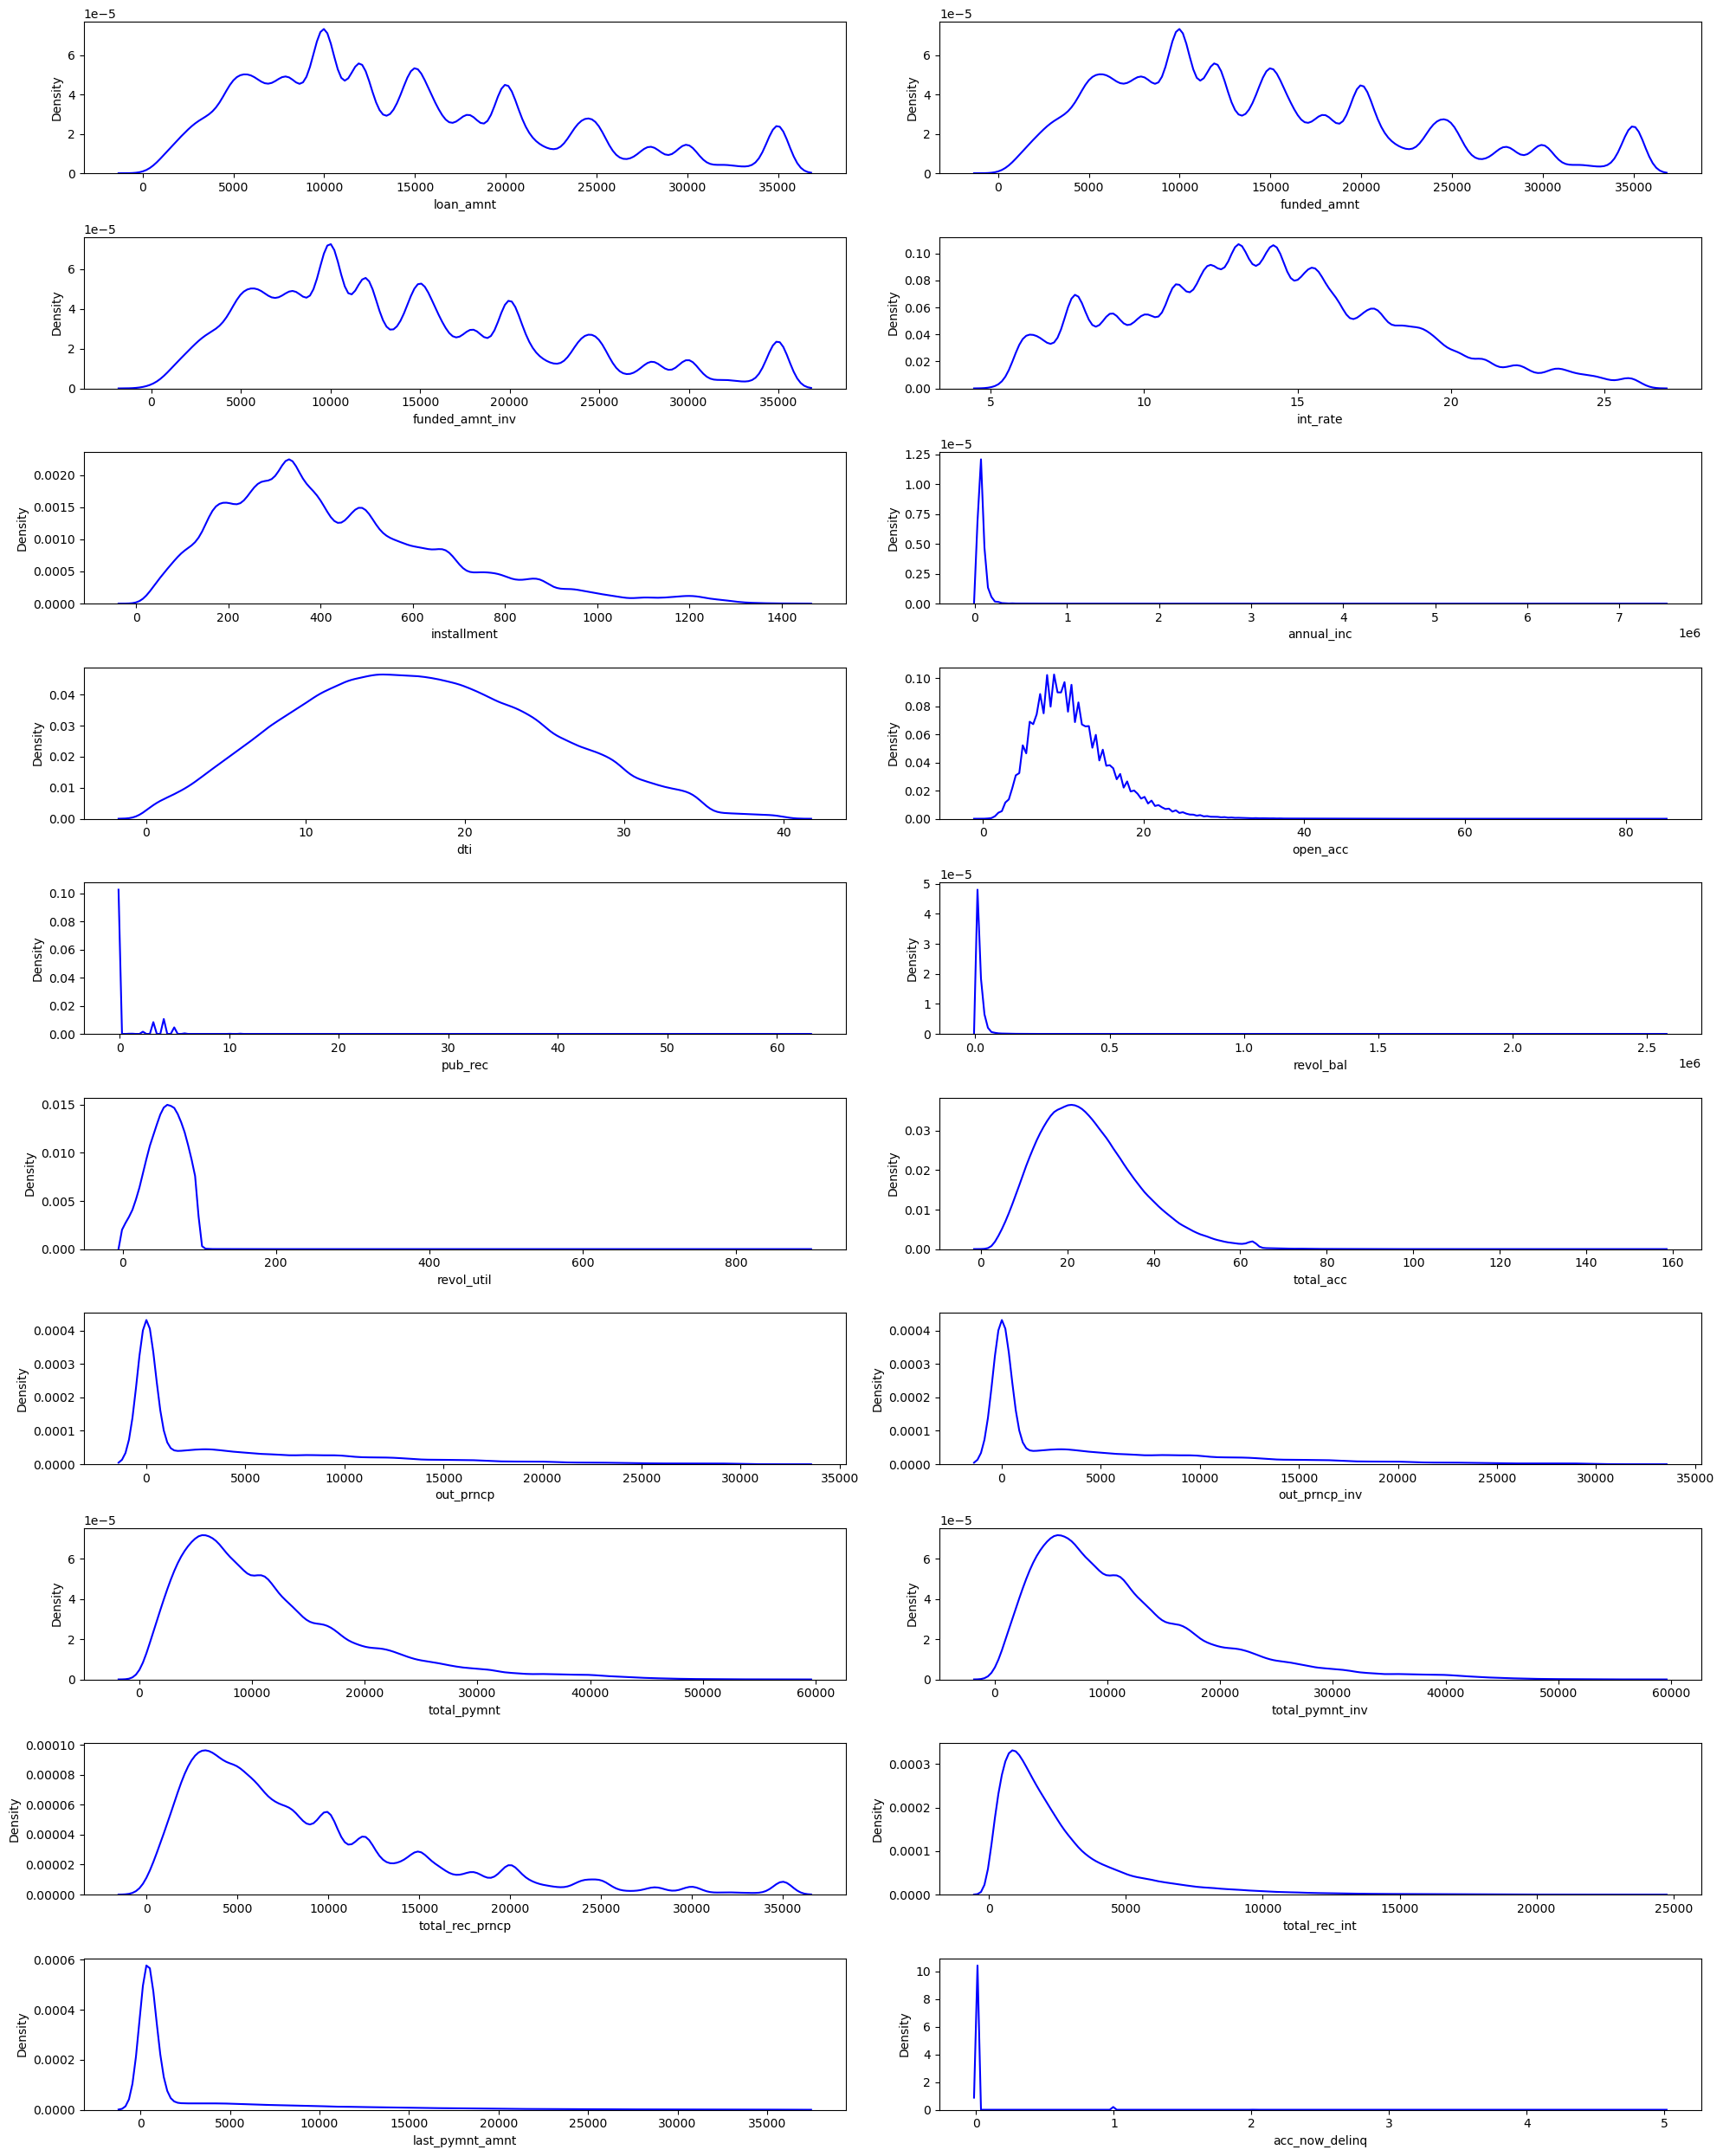

In [26]:
plt.figure(figsize=(20,25))
for i in range(0, len(data_numerical)):
    plt.subplot(10, 2, i+1)
    sns.kdeplot(x=new_data[data_numerical[i]],color='blue')
    plt.xlabel(data_numerical[i])
    plt.tight_layout()
    
plt.savefig('Univariate Analysis (Numerical).png')

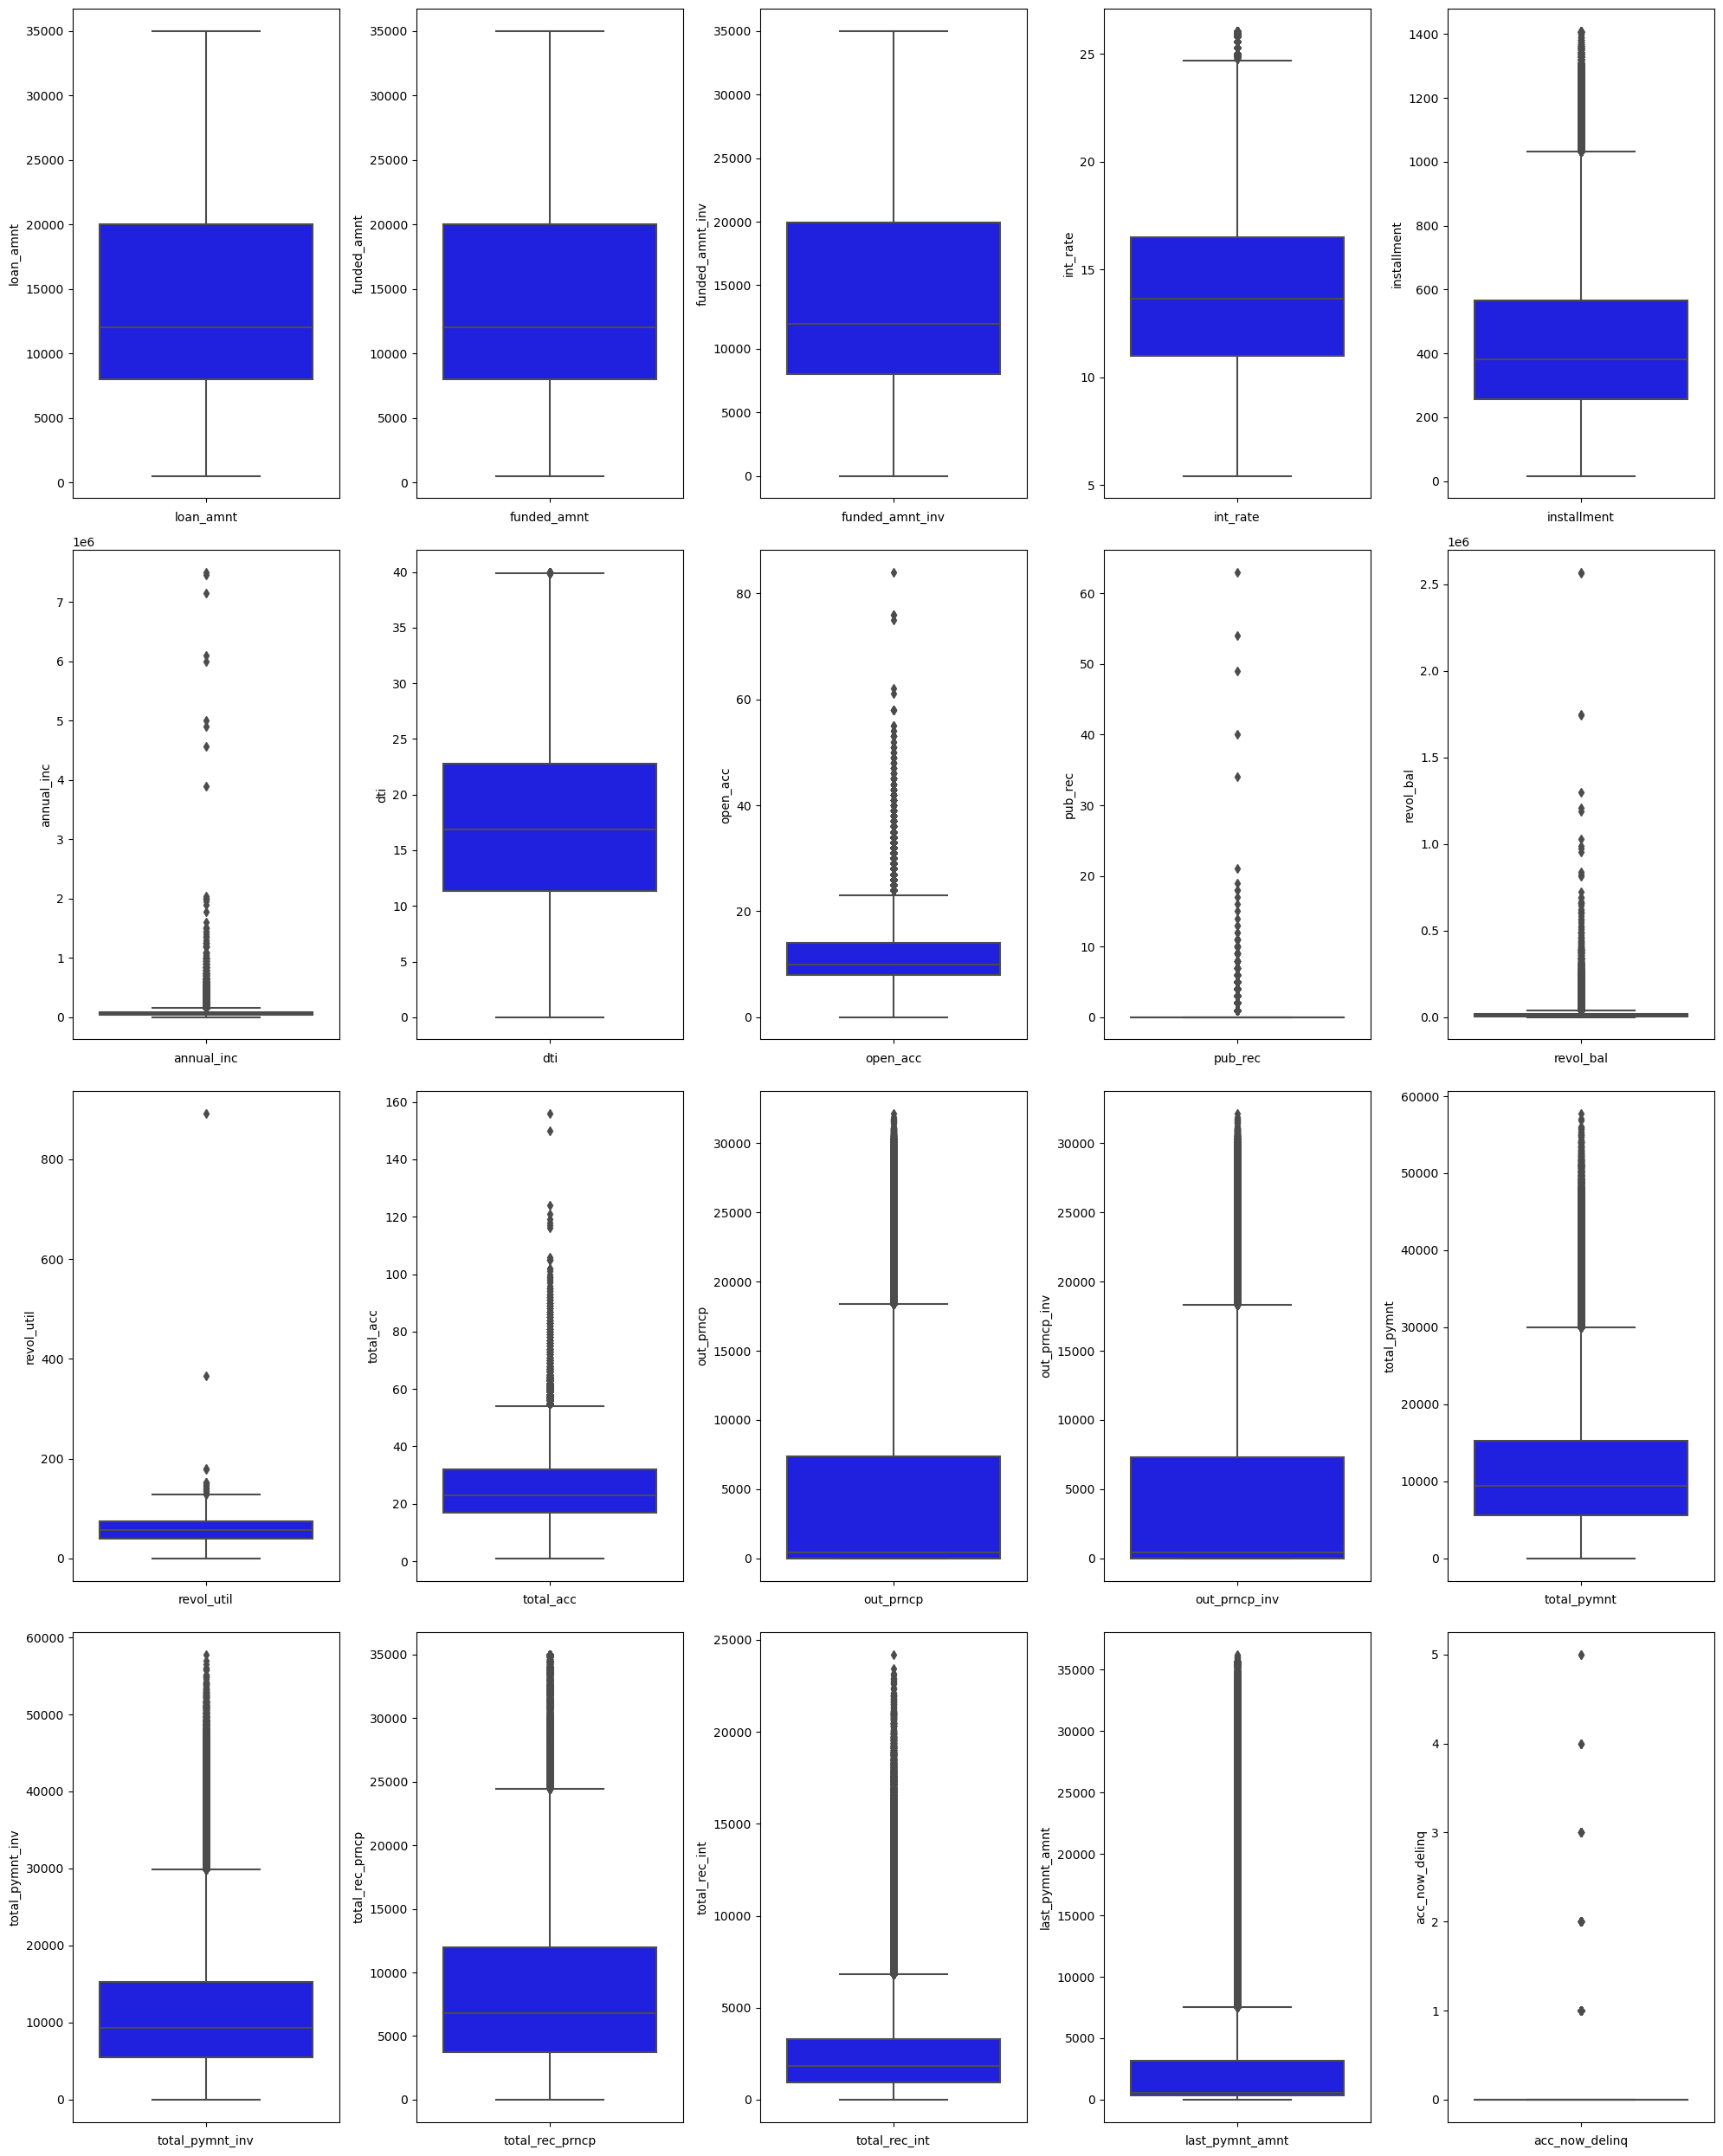

In [27]:
plt.figure(figsize=(20,25))
for i in range(0, len(data_numerical)):
    plt.subplot(4, 5, i+1)
    sns.boxplot(y=new_data[data_numerical[i]],color='blue',orient='v')
    plt.xlabel(data_numerical[i])
    plt.tight_layout()
    
plt.savefig('Univariate Analysis (Numerical) Boxplot.png')

<br> remove columns with unusual outliers such as `annual_inc`,`pub_rec`,`revol_bal`,`acc_now_delinq`

In [25]:
useless_columns = ['annual_inc','pub_rec','revol_bal','acc_now_delinq']
new_data = new_data.drop(useless_columns,axis=1)

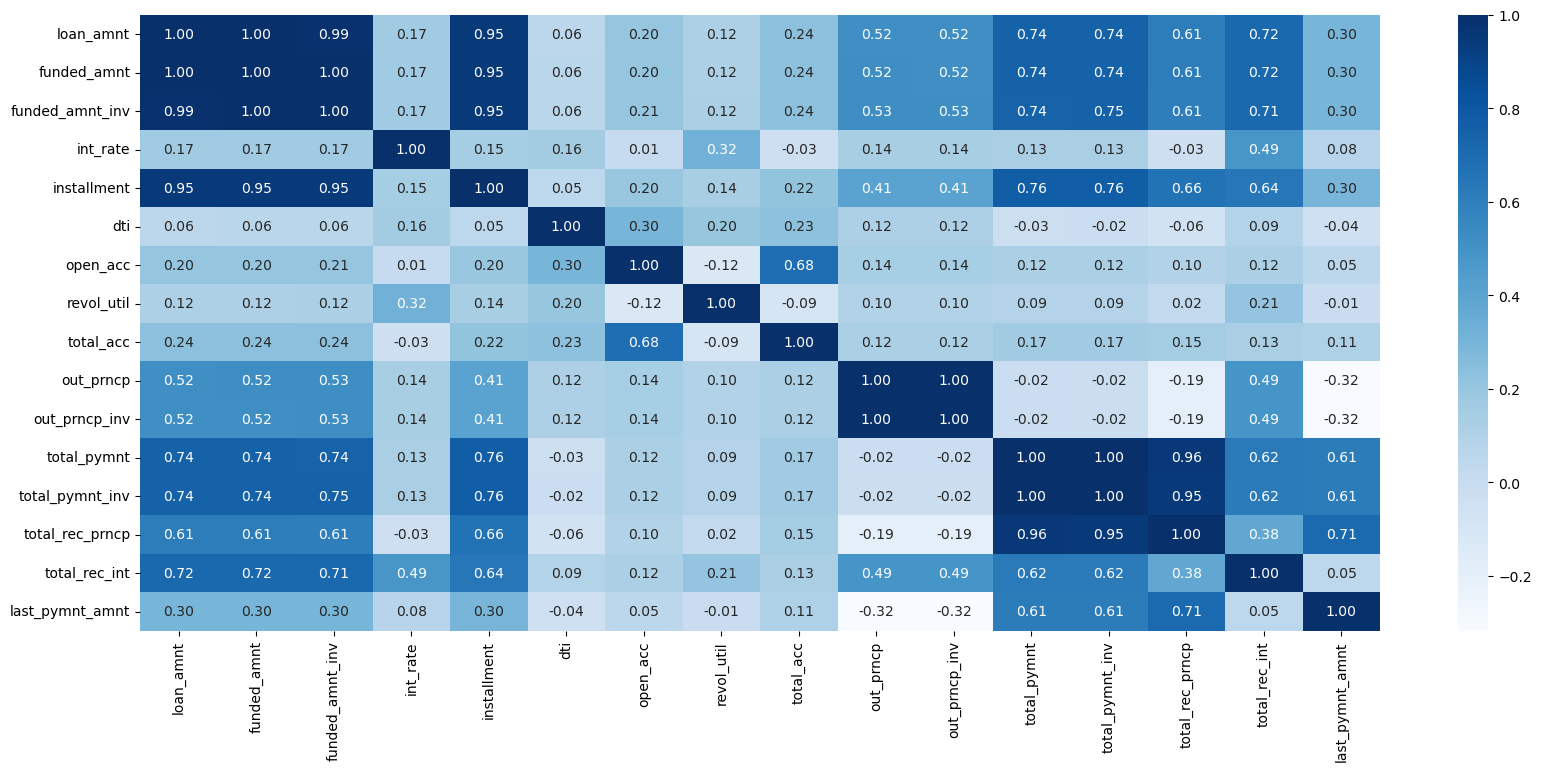

In [26]:
plt.figure(figsize=(20, 8))
sns.heatmap(new_data.corr(), cmap='Blues', annot=True, fmt='.2f');

## 2.2 Univariat Analysis (Categorical)

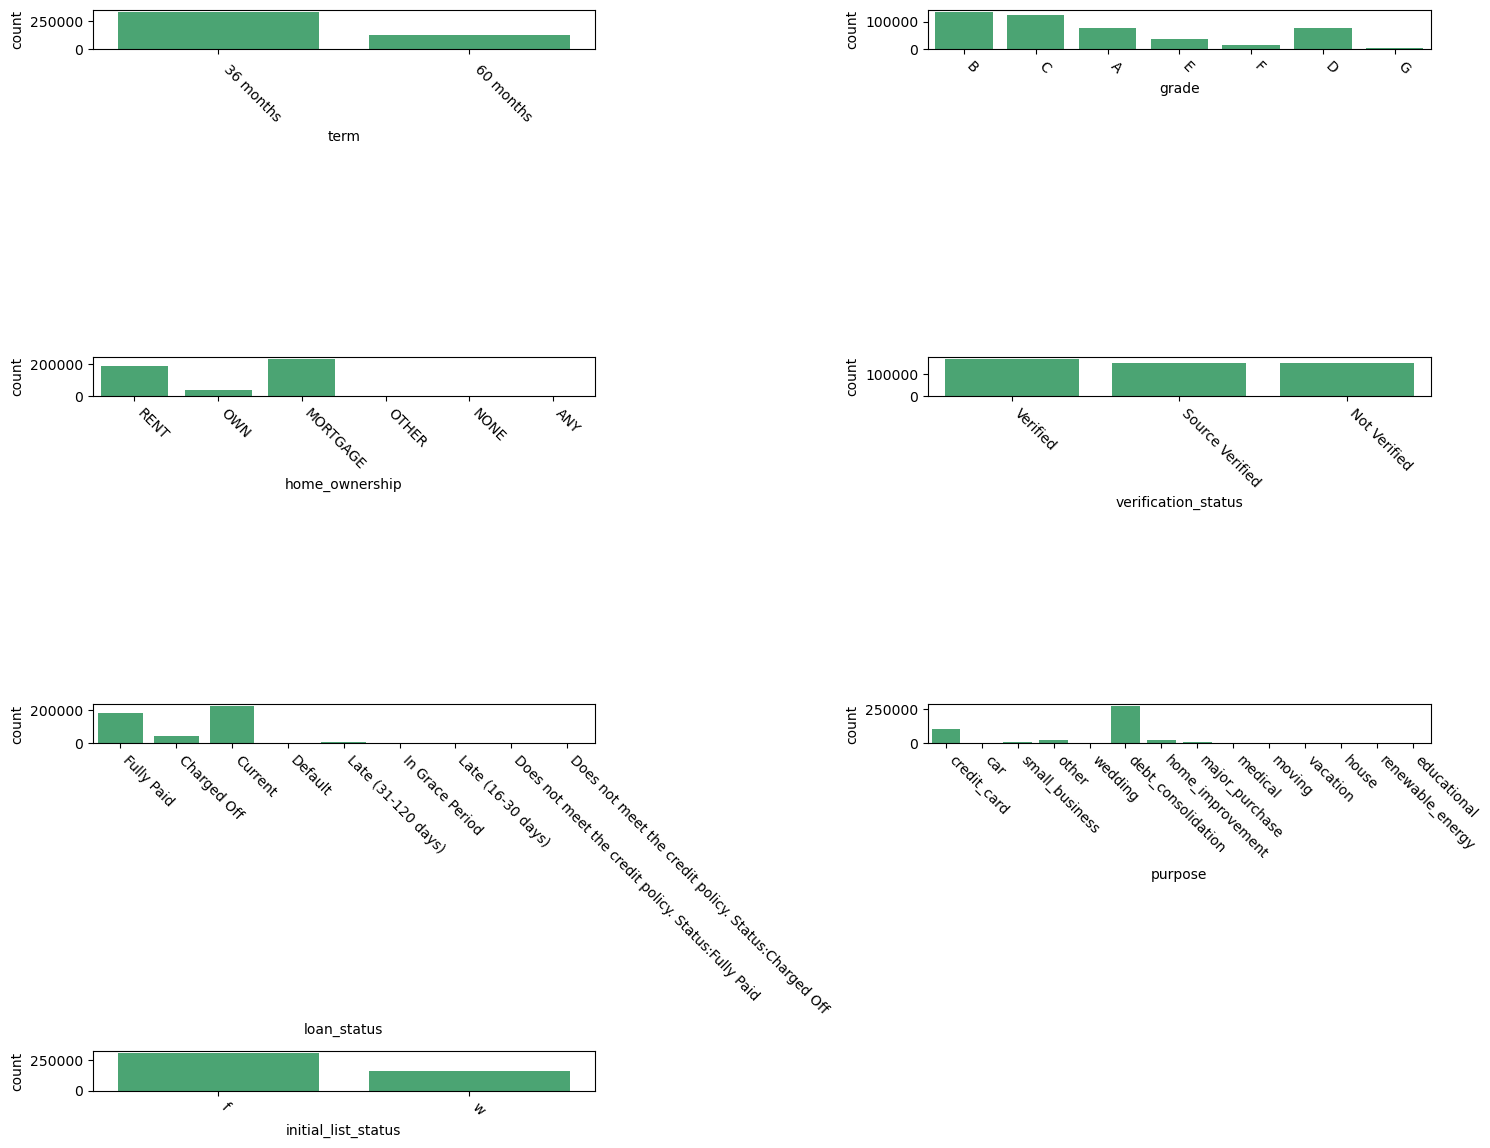

In [28]:
plt.figure(figsize=(15,25))
for i in range(0, len(data_categorical)):
    plt.subplot(8, 2, i+1)
    sns.countplot(x = new_data[data_categorical[i]], color='mediumseagreen', orient='v')
    plt.xlabel(data_categorical[i])
    plt.xticks(rotation=-45, ha='left')
    plt.tight_layout()
    
plt.savefig('Univariat Analysis (Categorical).png')

In [28]:
useless_columns = ['term','loan_status','purpose']
new_data = new_data.drop(useless_columns,axis=1)

# 3. Feature Engineering

## 3.1 Label Encoding

In [29]:
cat = list(new_data.describe(include='object').columns)
for i in cat:
    print(new_data[i].value_counts())

B    136929
C    125293
D     76888
A     74867
E     35757
F     13229
G      3322
Name: grade, dtype: int64
MORTGAGE    235875
RENT        188473
OWN          41704
OTHER          182
NONE            50
ANY              1
Name: home_ownership, dtype: int64
Verified           168055
Source Verified    149993
Not Verified       148237
Name: verification_status, dtype: int64
f    303005
w    163280
Name: initial_list_status, dtype: int64


In [30]:
mapVerification = {'Verified':0,'Source Verified':1,'Not Verified':2}
mapInitialList = {'f':0,'w':1}

new_data['verification_status'] = new_data['verification_status'].map(mapVerification)
new_data['initial_list_status'] = new_data['initial_list_status'].map(mapInitialList)

new_data[['verification_status','initial_list_status']].sample(5)

,verification_status,initial_list_status
71361,0,0
7672,1,0
325000,1,1
306001,0,1
41209,2,0


## 3.2 One-hot encoding

In [31]:
new_cat = list(new_data.describe(include='object').columns)
new_cat

['grade', 'home_ownership']

In [32]:
for i in new_cat:
    onehots = pd.get_dummies(new_data[i],prefix=i)
    new_data = new_data.join(onehots).drop(i,axis=1)
new_data.sample(5)

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,verification_status,dti,open_acc,revol_util,total_acc,...,grade_D,grade_E,grade_F,grade_G,home_ownership_ANY,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT
77240,4050,4050,4050.000000,13.67,137.78,1,28.36,25.0,14.1,46.0,...,0,0,0,0,0,0,0,0,0,1
98925,4800,4800,4800.000000,6.62,147.38,0,21.75,24.0,22.4,60.0,...,0,0,0,0,0,1,0,0,0,0
142245,6800,6800,6800.000000,14.09,232.71,2,18.61,18.0,36.6,35.0,...,0,0,0,0,0,1,0,0,0,0
37035,10000,10000,7812.508973,12.84,336.18,1,4.00,14.0,13.8,30.0,...,0,0,0,0,0,0,0,0,0,1
188664,26375,26375,26375.000000,22.47,735.52,0,23.34,12.0,92.6,15.0,...,0,1,0,0,0,0,0,0,0,1


# 4. Machine Learning Modelling

## 4.1 Variable Declaration

In [33]:
X = new_data.drop(['initial_list_status'],axis=1)
#independent variable
y = new_data['initial_list_status']
#dependent variable

## 4.2 Train Test Split

In [34]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

## 4.3 Fitting and Model Evaluation

In [35]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

- In this dataset i want to use some machine learning because have a dependent variable
1. Logistic Regression
2. K-Nearest Neighbours
3. Support Vector Machine
4. Naive Bayes
5. Decision Tree Classification
6. Random Forest Classification

In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, roc_auc_score, RocCurveDisplay, classification_report


lr = LogisticRegression(random_state=42)
knn = KNeighborsClassifier()
svc = SVC(random_state=42)
nb = GaussianNB()
dt = DecisionTreeClassifier(random_state=42)
rf = RandomForestClassifier(random_state=42)

model = [lr,knn,svc,nb,dt,rf]
summarize = pd.DataFrame({'model':[],'accuracy_train':[],'accuracy_test':[],'precesion':[],'recall':[],'rocauc':[]})

for i in model:
    i.fit(X_train, y_train)
    ytrainpredict = i.predict(X_train)
    ytestpredict = i.predict(X_test)
    accuracytrain = round(accuracy_score(y_train,ytrainpredict),3)
    accuracytest = round(accuracy_score(y_test,ytestpredict),3)
    precision = round(precision_score(y_test,ytestpredict),3)
    recall = round(recall_score(y_test,ytestpredict),3)
    rocauc = round(roc_auc_score(y_test,ytestpredict),3)
    name = f'{i}'.split('(')[0]
    summarize = summarize.append({'model':name,
                                  'accuracy_train':accuracytrain,
                                  'accuracy_test':accuracytest,
                                  'precision':precision,
                                  'recall':recall,
                                  'rocauc':rocauc},ignore_index=True)
    print(name)
    print(classification_report(y_test,ytestpredict))
summarize

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\ASUS\AppData\Local\Temp\ipykernel_13544\425168245.py:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  summarize = summarize.append({'model':name,


LogisticRegression
              precision    recall  f1-score   support

           0       0.70      0.91      0.79     60491
           1       0.62      0.27      0.38     32766

    accuracy                           0.69     93257
   macro avg       0.66      0.59      0.58     93257
weighted avg       0.67      0.69      0.65     93257



C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims`

KNeighborsClassifier
              precision    recall  f1-score   support

           0       0.71      0.79      0.75     60491
           1       0.51      0.41      0.45     32766

    accuracy                           0.65     93257
   macro avg       0.61      0.60      0.60     93257
weighted avg       0.64      0.65      0.64     93257



C:\Users\ASUS\AppData\Local\Temp\ipykernel_13544\425168245.py:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  summarize = summarize.append({'model':name,


SVC
              precision    recall  f1-score   support

           0       0.70      0.93      0.80     60491
           1       0.66      0.27      0.38     32766

    accuracy                           0.69     93257
   macro avg       0.68      0.60      0.59     93257
weighted avg       0.69      0.69      0.65     93257



C:\Users\ASUS\AppData\Local\Temp\ipykernel_13544\425168245.py:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  summarize = summarize.append({'model':name,


GaussianNB
              precision    recall  f1-score   support

           0       0.74      0.01      0.02     60491
           1       0.35      0.99      0.52     32766

    accuracy                           0.36     93257
   macro avg       0.55      0.50      0.27     93257
weighted avg       0.60      0.36      0.20     93257



C:\Users\ASUS\AppData\Local\Temp\ipykernel_13544\425168245.py:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  summarize = summarize.append({'model':name,


DecisionTreeClassifier
              precision    recall  f1-score   support

           0       0.72      0.71      0.71     60491
           1       0.48      0.49      0.48     32766

    accuracy                           0.63     93257
   macro avg       0.60      0.60      0.60     93257
weighted avg       0.63      0.63      0.63     93257

RandomForestClassifier
              precision    recall  f1-score   support

           0       0.73      0.86      0.79     60491
           1       0.62      0.41      0.49     32766

    accuracy                           0.70     93257
   macro avg       0.67      0.64      0.64     93257
weighted avg       0.69      0.70      0.69     93257



C:\Users\ASUS\AppData\Local\Temp\ipykernel_13544\425168245.py:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  summarize = summarize.append({'model':name,


,model,accuracy_train,accuracy_test,precesion,recall,rocauc,precision
0,LogisticRegression,0.689,0.687,NaN,0.272,0.592,0.625
1,KNeighborsClassifier,0.767,0.655,NaN,0.410,0.599,0.510
2,SVC,0.698,0.695,NaN,0.265,0.596,0.663
3,GaussianNB,0.355,0.355,NaN,0.994,0.502,0.352
4,DecisionTreeClassifier,1.000,0.631,NaN,0.486,0.598,0.476
5,RandomForestClassifier,1.000,0.703,NaN,0.408,0.636,0.617
